# Aprendiendo Pandas

En este notebook se describen las funciones más importantes de la biblioteca "Pandas".
___
## 1. DataFrames 
Como primer punto aprenderemos a realizar tablas de datos usando la función $DataFrame$. Para esto primero necesitamos importar la biblioteca y definirla como $pd$:
correo: jwong@cicese.edu.mx

In [1]:
import pandas as pd

In [3]:
datos = pd.DataFrame({"a" : [4, 5, 6],
                      "b" : [7, 8, 9],
                      "c" : [10, 11, 12]}, index = [1, 2, 3])
datos

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


De lo anterior hemos definido una tabla de datos con 3 columnas: $a, b, y c$, y 3 filas definidas por los indíces $1, 2 y 3$. Otra forma en la que podemos crear la tabla anterior es la siguiente:

In [5]:
datos = pd.DataFrame([[4, 7, 10], [5, 8, 11], [6, 9, 12]], 
                 index = [1, 2, 3], columns = ['a', 'b', 'c'])
datos

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


Otra característica de pandas es que nos permite añadir más indices. Para esto es necesario definir una variable $index$ y simplemente sustituir $index = ....$ de los ejemplos anteriores por $index = index$, tal como se muestra a continuación:

In [8]:
index = pd.MultiIndex.from_tuples([('d', 1), ('d', 2), ('e', 2)], names = ['n', 'v'])
datos = pd.DataFrame([[4, 7, 10], [5, 8, 11], [6, 9, 12]], 
                 index = index, columns = ['a', 'b', 'c'])
datos

a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

## 2. Reorganizando los datos
Pandas nos permite reorganizar las tablas de datos a nuestra conveniencia. Entre las funciones que podemos utilizar tenemos las siguientes:

A) Juntar columnas en filas usando pd.melt(datos)

In [14]:
datos_melt = pd.melt(datos)
datos_melt

,variable,value
0,a,4
1,a,5
2,a,6
3,b,7
4,b,8
5,b,9
6,c,10
7,c,11
8,c,12


B) Dispersar las filas en columnas usando la funcion $pivot$

In [18]:
datos_melt.pivot(columns = 'variable', values = 'value')

variable,a,b,c
0,4.0,NaN,NaN
1,5.0,NaN,NaN
2,6.0,NaN,NaN
3,NaN,7.0,NaN
4,NaN,8.0,NaN
5,NaN,9.0,NaN
6,NaN,NaN,10.0
7,NaN,NaN,11.0
8,NaN,NaN,12.0


C) Concatenar tablas. Para esto definimos las siguientes dos tablas donde cada una tiene información de densidades de roca, define el tipo de roca y enumera las muestras. Concatenando ambas se tiene lo siguiente:

In [26]:
df1 = pd.DataFrame({'Muestra' : [1, 2, 3], 
                    'Roca' : ['Caliza', 'Arenisca', 'Lutita'], 
                    'Densidad $g/cm^3$' : ['2.71', '2.85', '2.4']}, index = [1, 2, 3])
df2 = pd.DataFrame({'Muestra' : [4, 5, 6], 
                    'Roca' : ['Lutita', 'Caliza', 'Arenisca'], 
                    'Densidad $g/cm^3$' : ['2.45', '2.70', '2.8']}, index = [4, 5, 6])
df_concat = pd.concat([df1, df2])
df_concat

,Muestra,Roca,Densidad $g/cm^3$
1,1,Caliza,2.71
2,2,Arenisca,2.85
3,3,Lutita,2.4
4,4,Lutita,2.45
5,5,Caliza,2.70
6,6,Arenisca,2.8


Como podemos notar, la segunda tabla _df2_ aparece debajo de la primera. Esto es una concatenación de filas, sin embargo, tambíen podemos concatenar columnas. Para esto solo debemos anexar $axis = 1$, por ejemplo:

$pd.concat([df1, df2], axis = 1)$

**Otras funciones de utilidad pueden ser las siguientes:**
1. sort_values para ordenar filas por valores de menor a mayor o mayor a menos

In [30]:
print('De Menor a Mayor')
df_concat.sort_values(by = ['Densidad $g/cm^3$'])

De Menor a Mayor


,Muestra,Roca,Densidad $g/cm^3$
3,3,Lutita,2.4
4,4,Lutita,2.45
5,5,Caliza,2.70
1,1,Caliza,2.71
6,6,Arenisca,2.8
2,2,Arenisca,2.85


In [31]:
print('De Mayor a Menor')
df_concat.sort_values(by = ['Densidad $g/cm^3$'], ascending = False)

De Mayor a Menor


,Muestra,Roca,Densidad $g/cm^3$
2,2,Arenisca,2.85
6,6,Arenisca,2.8
1,1,Caliza,2.71
5,5,Caliza,2.70
4,4,Lutita,2.45
3,3,Lutita,2.4


2. Renombrar columnas

En este caso renombraremos la columna "Muestra" por "Núcleo".

In [32]:
df_concat.rename(columns = {'Muestra' : 'Núcleo'})

,Núcleo,Roca,Densidad $g/cm^3$
1,1,Caliza,2.71
2,2,Arenisca,2.85
3,3,Lutita,2.4
4,4,Lutita,2.45
5,5,Caliza,2.70
6,6,Arenisca,2.8


3. sort_index y reset_index para sortear o resetear los indices

In [36]:
ejemplo = pd.DataFrame([1, 2, 3, 4, 5], index=[100, 29, 234, 1, 150],
                  columns=['A'])
ejemplo_descendente = ejemplo.sort_index(ascending=False)

print('Ascendente')
print(ejemplo.sort_index())
print('Descendente')
print(ejemplo_descendente)

Ascendente
     A
1    4
29   2
100  1
150  5
234  3
Descendente
     A
234  3
150  5
100  1
29   2
1    4


Resetear el index consiste en ilustrar los indíces en forma numérica partiendo de 0 como en las tablas anteriores. Para ilustrar esto utilizaremos la siguiente tabla y usamos la función "reset_index()"

In [38]:
import numpy as np # Importamos la biblioteca numpy
reset_ejemplo = pd.DataFrame([('bird', 389.0),
                   ('Pájaro', 24.0),
                   ('mamífero', 80.5),
                   ('mamífero', np.nan)],
                  index=['Halcón', 'Perico', 'León', 'Mono'],
                  columns=('Clase', 'Velocidad máxima'))
reset_ejemplo

,Clase,Velocidad máxima
Halcón,bird,389.0
Perico,Pájaro,24.0
León,mamífero,80.5
Mono,mamífero,NaN


In [39]:
reset_ejemplo.reset_index()

,index,Clase,Velocidad máxima
0,Halcón,bird,389.0
1,Perico,Pájaro,24.0
2,León,mamífero,80.5
3,Mono,mamífero,NaN


4. Eliminar columnas. Para esto eliminaremos la columna "Clase" de la tabla anterior.

In [40]:
reset_ejemplo.drop(columns = ['Clase'])

,Velocidad máxima
Halcón,389.0
Perico,24.0
León,80.5
Mono,NaN


## 3. Subconjuntos
___
Para hablar de subconjuntos podemos considerar las observaciones, variables o ambas.
1. Subconjunto de observaciones

En esta parte hablaremos de funciones que nos permitan eliminar filas duplicadas, seleccionar una fila en específico o $n$ filas, seleccionar y ordenar entradas. Para esto usaremos los siguientes datos:

In [58]:
data = pd.read_csv('weather.nominal.csv')
data1 = pd.DataFrame(data)
data1

data2 = pd.DataFrame({ 
                      'outlook':['sunny', 'rainy'], 
                      'temperature' : ['hot', 'mild'], 
                      'humidity' : ['high', 'high'], 
                      'windy' : ['False', 'False'], 
                      'play' : ['no', 'yes']})
data_df = pd.concat([data1, data2])
data_df = data_df.reset_index()
data_df = data_df.drop(columns = ['index'])
data_df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [60]:
# Eliminando filas duplicadas
duplicado = data_df.drop_duplicates(subset=['windy'])
duplicado

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
14,sunny,hot,high,False,no


De lo anterior hemos definido que se eliminen todas las filas duplicadas considerando la columna $windy$. Para seleccionar una muestra en específico hacemos lo siguiente:

In [62]:
# Seleccionando un conjunto de filas aleatoriamente:
data_df.sample(frac=0.5)

,outlook,temperature,humidity,windy,play
8,sunny,cool,normal,False,yes
2,overcast,hot,high,False,yes
14,sunny,hot,high,False,no
5,rainy,cool,normal,True,no
3,rainy,mild,high,False,yes
7,sunny,mild,high,False,no
13,rainy,mild,high,True,no
9,rainy,mild,normal,False,yes


In [63]:
data_df.sample(n=10)

,outlook,temperature,humidity,windy,play
2,overcast,hot,high,False,yes
11,overcast,mild,high,True,yes
14,sunny,hot,high,False,no
6,overcast,cool,normal,True,yes
4,rainy,cool,normal,False,yes
8,sunny,cool,normal,False,yes
1,sunny,hot,high,True,no
10,sunny,mild,normal,True,yes
7,sunny,mild,high,False,no
0,sunny,hot,high,False,no


La diferencia de lo anterior consiste en que frac=0.5 selecciona aleatoriamente filas, pero solamente la mitad de todas las filas. Por otro lado, n=10 específica que quiere 10 filas.

In [71]:
# Selecciona y ordena las entradas n considerando el mayor valor de la columna
df_concat.nlargest(n = 2, columns='Muestra')

,Muestra,Roca,Densidad $g/cm^3$
6,6,Arenisca,2.8
5,5,Caliza,2.70


In [72]:
# Selecciona y ordena las entradas n considerando el menor valor de la columna
df_concat.nsmallest(n = 2, columns='Muestra')

,Muestra,Roca,Densidad $g/cm^3$
1,1,Caliza,2.71
2,2,Arenisca,2.85


In [75]:
# Seleccionando las primeras "n" filas 
df_concat.head(n=1)

,Muestra,Roca,Densidad $g/cm^3$
1,1,Caliza,2.71


In [77]:
# Seleccionando las últimas "n" filas 
df_concat.tail(n=1)

,Muestra,Roca,Densidad $g/cm^3$
6,6,Arenisca,2.8


De lo anterior hemos tomado la primera y la última fila, esto ya que consideramos n=1. Si n fuera igual a otro valor, ej: n=5 entonces obtendríamos las primeras y últimas 5 filas.

2. Subconjunto de variables 

En esta parte hablaremos de como seleccionar una o múltiples columnas específicas o aquellas que coincidan con lo que definamos. Para esto usaremos los datos guardados en la variable 'data_df'.

In [81]:
# Seleccionar múltiples columnas (específicas)
data_df[['temperature', 'humidity']]

,temperature,humidity
0,hot,high
1,hot,high
2,hot,high
3,mild,high
4,cool,normal
5,cool,normal
6,cool,normal
7,mild,high
8,cool,normal
9,mild,normal


In [83]:
# Seleccionando una columna en específico
data_df['play']

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
Name: play, dtype: object

In [84]:
# Seleccionando las columnas que coincidan con una descripción
data_df.filter(regex = 'hu')

,humidity
0,high
1,high
2,high
3,high
4,normal
5,normal
6,normal
7,high
8,normal
9,normal


De lo anterior definimos que queremos la o las columnas que empiecen con "hu". En nuestro caso solo una columna cumple con la descripción.

3. Subconjunto - Filas y columnas

En esta sección vamos a seleccionar un determinado conjunto de filas y columnas. Como primer punto aprenderemos a seleccionar un conjunto determinado de filas y columnas usando la funcion $iloc$. En el siguiente ejemplo seleccionaremos las filas: 2 a 5, y columnas: 2 y 4. Vemos que en el rango de filas ponemos 2:6, pero no se muestra la fila 6. Esto es debido a que definimos un límite y estamos considerando las filas antes de ese límite.

In [86]:
data_df.iloc[2:6, [2, 4]]

,humidity,play
2,high,yes
3,high,yes
4,normal,yes
5,normal,no


También podemos usar la función $loc$ para seleccionar las columnas entre dos rangos. En el siguiente ejemplo al poner ":" definimos que queremos todos los datos en esas columnas.

In [87]:
data_df.loc[:, 'outlook':'humidity']

,outlook,temperature,humidity
0,sunny,hot,high
1,sunny,hot,high
2,overcast,hot,high
3,rainy,mild,high
4,rainy,cool,normal
5,rainy,cool,normal
6,overcast,cool,normal
7,sunny,mild,high
8,sunny,cool,normal
9,rainy,mild,normal


Además de lo anterior, también podemos acceder a valores en específico usando las funciones $iat$ y $at$. Con $iat$ debemos definir las coordenadas del valor y con $at$ podemos utilizar el nombre de la columna.

In [88]:
print('Valor en coordenadas (1,2): ', data_df.iat[1,2])
print('Valor en coordenada 4 y columna play: ', data_df.at[4,'play'])

Valor en coordenadas (1,2):  high
Valor en coordenada 4 y columna play:  yes


## 4. Resumiendo datos
Las funciones que podemos utilizar para resumir los datos pueden ser las siguientes:
1. value_counts(), que cuenta el número de filas
2. len(df), que nos indica cuantas filas tenemos,
3. shape(), para saber las dimensiones de nuestro DataFrame,
4. nunique(), para conocer el número de valores distintos en una columna y,
5. describe(), que nos ofrece una descripción básica y estadisticas de cada columna.

Entre otras funciones importantes relacionadas con las descripciones y estadísticas de los datos, la biblioteca de pandas nos provee de un conjunto extenso de funciones que operan en diferentes tipos de objetos y produce valores únicos para cada uno de los grupos. Ejemplo de estas funciones son las siguientes:
- sum() : Para sumar valores de cada objeto,
- count() : Para contar los valores no nulos de cada objeto,
- median() : Para obtener la mediana,
- quantile([0.25, 0.75]) : Calcula los cuántiles de cada objeto,
- min() y max() : Para la media,
- var() y std() : Para obtener la varianza y la desviación estándar de cada objeto,
- apply(_funcion_) : Para aplicar una función a cada objeto.

Para ilustrar lo anterior, utilzaremos los siguientes datos de pacientes con diabetes:

In [93]:
diabetes = pd.DataFrame(
    {'AGE' : [59, 48, 72, 24, 50, 23, 36, 66, 60, 29, 22, 56, 53, 50],
     'SEX' : [2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2], 
     'BMI': [32.1, 21.6, 30.5, 25.3, 23, 22.6, 22, 26.2, 32.1, 30, 18.6, 28, 23.7, 26.2], 
     'BP' : [101, 87, 93, 84, 101, 89, 90, 114, 83, 85, 97, 85, 92, 97]})
diabetes

# donde: AGE = Edad; SEX = Sexo; BMI = Indice de masa corporal; BP = Presión (media) 

,AGE,SEX,BMI,BP
0,59,2,32.1,101
1,48,1,21.6,87
2,72,2,30.5,93
3,24,1,25.3,84
4,50,1,23.0,101
5,23,1,22.6,89
6,36,2,22.0,90
7,66,2,26.2,114
8,60,2,32.1,83
9,29,1,30.0,85


In [99]:
print('Obteniendo una serie que contiene la frecuencia con la que un valor se repite en una determinada columna')
diabetes['AGE'].value_counts()

Obteniendo una serie que contiene la frecuencia con la que un valor se repite en una determinada columna


50    2
66    1
36    1
24    1
72    1
48    1
53    1
22    1
23    1
56    1
59    1
60    1
29    1
Name: AGE, dtype: int64

In [100]:
print('Número de filas')
len(diabetes)

Número de filas


14

In [102]:
print('Dimensiones del DataFrame (filas, columnas)')
diabetes.shape

Dimensiones del DataFrame (filas, columnas)


(14, 4)

In [103]:
print('Describe, nos ofrece una descripción básica y estadística de cada columna')
diabetes.describe()

,AGE,SEX,BMI,BP
count,14.000000,14.000000,14.000000,14.000000
mean,46.285714,1.500000,25.850000,92.714286
std,16.647608,0.518875,4.214398,8.641835
min,22.000000,1.000000,18.600000,83.000000
25%,30.750000,1.000000,22.700000,85.500000
50%,50.000000,1.500000,25.750000,91.000000
75%,58.250000,2.000000,29.500000,97.000000
max,72.000000,2.000000,32.100000,114.000000


Lo anterior puede comprobarse utilizando las funciones de panda para un análisis descrptivo.

In [109]:
print('Mediana')
print(diabetes.median())

print('Media')
print(diabetes.mean())

print('Cuantil')
print(diabetes.quantile([0.25, 0.75]))

print('Desviación estándar')
print(diabetes.std())

Mediana
AGE    50.00
SEX     1.50
BMI    25.75
BP     91.00
dtype: float64
Media
AGE    46.285714
SEX     1.500000
BMI    25.850000
BP     92.714286
dtype: float64
Cuantil
        AGE  SEX   BMI    BP
0.25  30.75  1.0  22.7  85.5
0.75  58.25  2.0  29.5  97.0
Desviación estándar
AGE    16.647608
SEX     0.518875
BMI     4.214398
BP      8.641835
dtype: float64


## 5. Trabajando con datos NaN
En ocasiones los datos pueden contener valores nulos o valores NaN. Si este fuese el caso, pandas provee funciones para poder trabajar con ellos, tales como: dropna() y fillna(). Por ejemplo:

In [110]:
diabetes = pd.DataFrame(
    {'AGE' : [np.nan, 48, 72, 24, np.nan, 23, 36, np.nan, 60, 29, 22, 56, 53, 50],
     'SEX' : [2, 1, 2, np.nan, 1, 1, 2, 2, 2, 1, 1, 2, 1, np.nan], 
     'BMI': [32.1, 21.6, 30.5, 25.3, 23, 22.6, np.nan, 26.2, 32.1, 30, 18.6, 28, 23.7, 26.2], 
     'BP' : [101, 87, 93, 84, 101, 89, 90, np.nan, 83, 85, 97, np.nan, 92, np.nan]})
diabetes

,AGE,SEX,BMI,BP
0,NaN,2.0,32.1,101.0
1,48.0,1.0,21.6,87.0
2,72.0,2.0,30.5,93.0
3,24.0,NaN,25.3,84.0
4,NaN,1.0,23.0,101.0
5,23.0,1.0,22.6,89.0
6,36.0,2.0,NaN,90.0
7,NaN,2.0,26.2,NaN
8,60.0,2.0,32.1,83.0
9,29.0,1.0,30.0,85.0


In [111]:
# Eliminando las filas que contienen valores nulos
diabetes.dropna()

,AGE,SEX,BMI,BP
1,48.0,1.0,21.6,87.0
2,72.0,2.0,30.5,93.0
5,23.0,1.0,22.6,89.0
8,60.0,2.0,32.1,83.0
9,29.0,1.0,30.0,85.0
10,22.0,1.0,18.6,97.0
12,53.0,1.0,23.7,92.0


In [113]:
# Reemplazando los valores NaN con 1
diabetes.fillna('1')

,AGE,SEX,BMI,BP
0,1,2.0,32.1,101.0
1,48.0,1.0,21.6,87.0
2,72.0,2.0,30.5,93.0
3,24.0,1,25.3,84.0
4,1,1.0,23.0,101.0
5,23.0,1.0,22.6,89.0
6,36.0,2.0,1,90.0
7,1,2.0,26.2,1
8,60.0,2.0,32.1,83.0
9,29.0,1.0,30.0,85.0


## 6. Haciendo nuevas columnas

In [115]:
# Creando una columna nueva usando la función assign.
# Esta función consiste en definir una columna nueva a partir de columnas existentes o funciones aritméticas
diabetes.assign(Ejemplo = lambda x: x.BP* 9 / 5 + 32)

,AGE,SEX,BMI,BP,Ejemplo
0,NaN,2.0,32.1,101.0,213.8
1,48.0,1.0,21.6,87.0,188.6
2,72.0,2.0,30.5,93.0,199.4
3,24.0,NaN,25.3,84.0,183.2
4,NaN,1.0,23.0,101.0,213.8
5,23.0,1.0,22.6,89.0,192.2
6,36.0,2.0,NaN,90.0,194.0
7,NaN,2.0,26.2,NaN,NaN
8,60.0,2.0,32.1,83.0,181.4
9,29.0,1.0,30.0,85.0,185.0


También podemos crear una columna nueva de la siguiente manera:

In [117]:
diabetes['Ejemplo'] = diabetes.BP* 9 / 5 + 32
diabetes

,AGE,SEX,BMI,BP,Ejemplo
0,NaN,2.0,32.1,101.0,213.8
1,48.0,1.0,21.6,87.0,188.6
2,72.0,2.0,30.5,93.0,199.4
3,24.0,NaN,25.3,84.0,183.2
4,NaN,1.0,23.0,101.0,213.8
5,23.0,1.0,22.6,89.0,192.2
6,36.0,2.0,NaN,90.0,194.0
7,NaN,2.0,26.2,NaN,NaN
8,60.0,2.0,32.1,83.0,181.4
9,29.0,1.0,30.0,85.0,185.0


Además de lo anterior, Panda proporciona un conjunto de funciones vectoriales que operan en todas las columnas de un DataFrame o en una sola. Estas funciones pueden producir vectores de valores para cada una de las columnas. Por ejemplo:
- max(axis=1) : Máximo por elementos 
- min(axis=1) : Mínimo por elementos
- abs() : Para calcular el valor absoluto

## 7. Combinando conjuntos de datos
Cuando hablamos de combinar set de datos existen dos formas de unión:
- Uniones estándar
- Uniones filtradas

Para explicar esto consideremos los conjuntos adf y bdf:

In [122]:
adf = pd.DataFrame({ 'x1' : ['A', 'B', 'C'], 
                   'x2' : [1, 2, 3]})
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [123]:
bdf = pd.DataFrame({ 'x1' : ['A', 'B', 'D'], 
                   'x3' : ['T', 'F', 'T']})
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


*Uniones estándar*
___

In [124]:
# Uniendo filas coincidentes de bdf a adf
pd.merge(adf, bdf, how='left', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [125]:
# Uniendo filas coincidentes de adf a bdf
pd.merge(adf, bdf, how='right', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [126]:
# Uniendo los datos. Mantiene solo las filas en ambos conjuntos
pd.merge(adf, bdf, how='inner', on='x1')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [127]:
# Uniendo los datos. Mantiene todos los valores, todas las filas
pd.merge(adf, bdf, how='outer', on='x1')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


*Uniones filtradas*
___

In [129]:
# Mantenemos todas las filas en adf que coincidan con bdf basándonos en la columna x1
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [130]:
# Mantenemos todas las filas en adf que no coincidan con bdf basándonos en la columna x1
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


Además de uniones, tambíen podemos realizar operaciones entre conjuntos de datos, por ejemplo:

In [132]:
xdf = pd.DataFrame({ 'x1' : ['A', 'B', 'C'], 
                   'x2' : [1, 2, 3]})
ydf = pd.DataFrame({ 'x1' : ['B', 'C', 'D'], 
                   'x2' : [2, 3, 4]})
print('Sumando los conjuntos de datos')
xdf + ydf

Sumando los conjuntos de datos


,x1,x2
0,AB,3
1,BC,5
2,CD,7


*Operaciones tipo conjunto*

In [134]:
# Obtenemos un nuevo onjunto de datos que consiste en las filas que aparecen en ambos conjuntos de datos 
pd.merge(xdf, ydf)

,x1,x2
0,B,2
1,C,3


In [136]:
# En este caso creamos un nuevo conjunto de datos que consiste en las filas que aparecen en ambos conjuntos
pd.merge(xdf, ydf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


## 8. Grupo de datos
___

Para poder definir un grupo utilizamos la función $groupby(by = 'columna_de_interes')$, la cual nos regresa un grupo de valores contenidas en la columna deseada. En dado caso de desear un grupo definido por indice modificamos lo anterior de la siguiente manera: $groupby(level='ind')$ donde ind representa el indice deseado. Ejemplo:

In [144]:
diabetes.groupby(['SEX']).mean()

,AGE,BMI,BP,Ejemplo
SEX,,,,
1.0,35.0,23.25,91.833333,197.30
2.0,56.0,29.78,91.750000,197.15


Veamos como definimos un grupo que considera la media de la columna SEX. Por tanto, los grupos pueden ser definidos también usando las funciones aritméticas definidas anteriormente.
Otras funciones que igualmente pueden aplicarse a un grupo son las siguientes:
- cumsum(), que nos proporciona una suma acumulativa.
- cummax() y cummin(), que proporciona un máximo y mínimo acumulativo, respectivamente.
- cumprod(), que proporciona un producto acumulativo.
Entre otras funciones.

## 9. Visualización de los datos
___

En esta última parte veremos dos funciones útiles para poder visualizar el comportamiento de nuestros datos. Estas funciones son plot.hist() que nos genera un histograma y plot.scatter() que genera un gráfico de dispersión. Consideremos el conjunto de datos "diabetes" como ejemplo:

<Axes: title={'center': 'Histograma'}, ylabel='Frequency'>

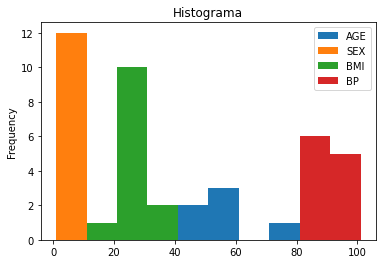

In [147]:
diabetes = pd.DataFrame(
    {'AGE' : [np.nan, 48, 72, 24, np.nan, 23, 36, np.nan, 60, 29, 22, 56, 53, 50],
     'SEX' : [2, 1, 2, np.nan, 1, 1, 2, 2, 2, 1, 1, 2, 1, np.nan], 
     'BMI': [32.1, 21.6, 30.5, 25.3, 23, 22.6, np.nan, 26.2, 32.1, 30, 18.6, 28, 23.7, 26.2], 
     'BP' : [101, 87, 93, 84, 101, 89, 90, np.nan, 83, 85, 97, np.nan, 92, np.nan]})
diabetes.plot.hist(title='Histograma')

<Axes: title={'center': 'Grafico de dispersión'}, xlabel='AGE', ylabel='BMI'>

<Figure size 720x720 with 0 Axes>

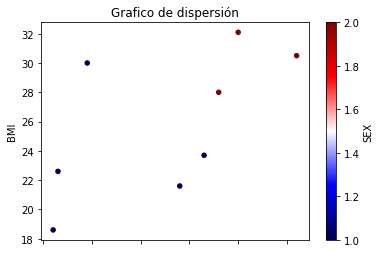

In [154]:
diabetes.plot.scatter(x = 'AGE', y = 'BMI', c = 'SEX', colormap = 'seismic', title = 'Grafico de dispersión')

Este último grafico nos muestra la dispersión de los datos considerando las variables de edad (eje x) e índice de masa corporal (eje y). Además, se añade una tercer variable que indica el color de los puntos, en este caso definido por el sexo, definido por la barra de colores (cmap = 'seismic').